# Loan Sanction Amount

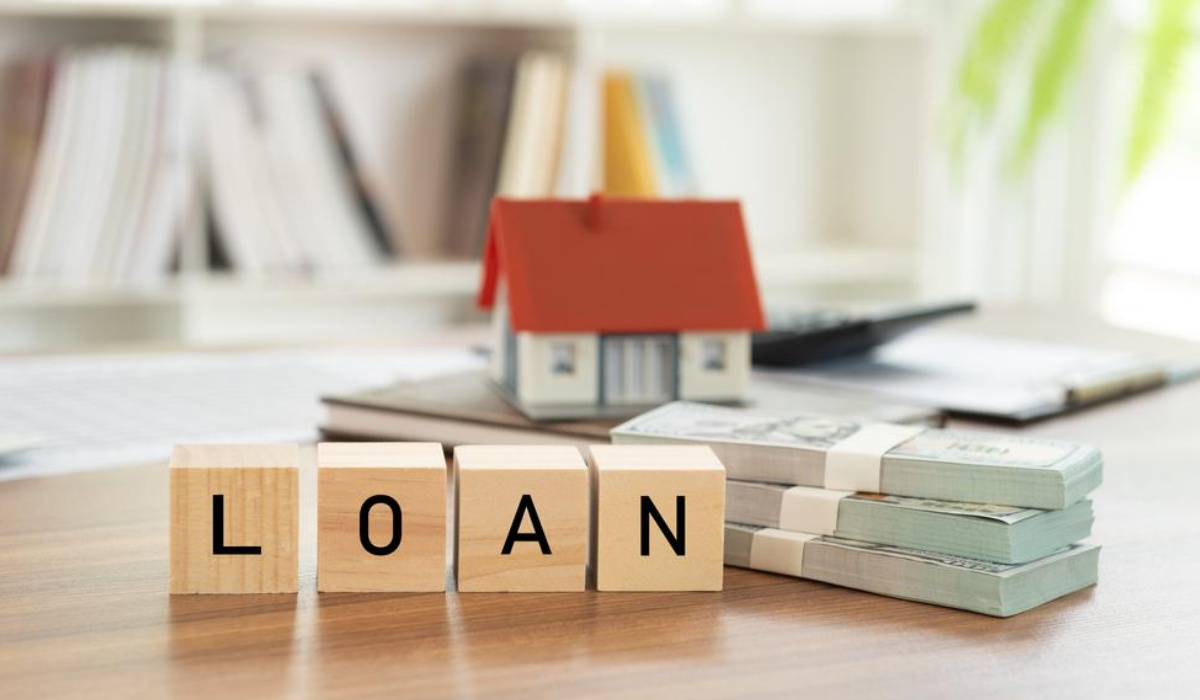


1.   profile report installation

2.   with autogluon installation



In [1]:
# !pip install autogluon
# !pip install dask --upgrade
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Training Data

In [3]:
train_data=pd.read_csv("https://raw.githubusercontent.com/Atharv-Chaudhari/Cipla-Loan-Prediction-Hackerearth-Competition/main/dataset/train.csv")
train_data

Customer ID  ... Loan Sanction Amount (USD)
0         C-36995  ...                   54607.18
1         C-33999  ...                   37469.98
2          C-3770  ...                   36474.43
3         C-26480  ...                   56040.54
4         C-23459  ...                   74008.28
...           ...  ...                        ...
29995     C-43723  ...                   68992.11
29996     C-32511  ...                   46616.60
29997      C-5192  ...                   61057.56
29998     C-12172  ...                   99766.87
29999     C-33003  ...                  117217.90

[30000 rows x 24 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [5]:
train_data.describe()

Age  Income (USD)  ...  Property Price  Loan Sanction Amount (USD)
count  30000.000000  2.542400e+04  ...    3.000000e+04                29660.000000
mean      40.092300  2.630574e+03  ...    1.317597e+05                47649.342208
std       16.045129  1.126272e+04  ...    9.354955e+04                48221.146686
min       18.000000  3.777000e+02  ...   -9.990000e+02                 -999.000000
25%       25.000000  1.650457e+03  ...    6.057216e+04                    0.000000
50%       40.000000  2.222435e+03  ...    1.099936e+05                35209.395000
75%       55.000000  3.090593e+03  ...    1.788807e+05                74261.250000
max       65.000000  1.777460e+06  ...    1.077967e+06               481907.320000

[8 rows x 13 columns]

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data)

In [7]:
profile.to_file('train_profile_report.html')
import IPython
IPython.display.HTML(filename='/content/train_profile_report.html')

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
sns.heatmap(data = train_data.isnull(),cmap='viridis')

In [9]:
train_data.drop(columns=["Customer ID","Name"],inplace=True)

In [10]:
train_data

Gender  Age  ...  Property Price Loan Sanction Amount (USD)
0          F   56  ...       119933.46                   54607.18
1          M   32  ...        54791.00                   37469.98
2          F   65  ...        72440.58                   36474.43
3          F   65  ...       121441.51                   56040.54
4          F   31  ...       208567.91                   74008.28
...      ...  ...  ...             ...                        ...
29995      M   38  ...       111096.56                   68992.11
29996      M   20  ...        73453.94                   46616.60
29997      F   49  ...       102108.02                   61057.56
29998      M   38  ...       168194.47                   99766.87
29999      F   63  ...       194512.60                  117217.90

[30000 rows x 22 columns]

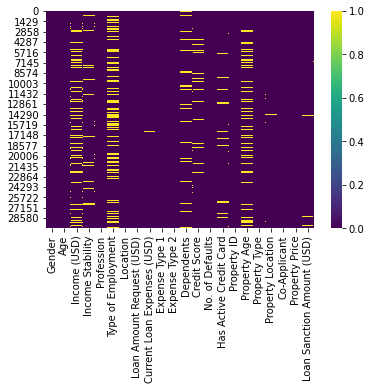

In [11]:
sns.heatmap(data = train_data.isnull(),cmap='viridis')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29947 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 25424 non-null  float64
 3   Income Stability             28317 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  29828 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   27507 non-null  float64
 12  Credit Score                 28297 non-null  float64
 13  No. of Defaults 

In [13]:
train_data

Gender  Age  ...  Property Price Loan Sanction Amount (USD)
0          F   56  ...       119933.46                   54607.18
1          M   32  ...        54791.00                   37469.98
2          F   65  ...        72440.58                   36474.43
3          F   65  ...       121441.51                   56040.54
4          F   31  ...       208567.91                   74008.28
...      ...  ...  ...             ...                        ...
29995      M   38  ...       111096.56                   68992.11
29996      M   20  ...        73453.94                   46616.60
29997      F   49  ...       102108.02                   61057.56
29998      M   38  ...       168194.47                   99766.87
29999      F   63  ...       194512.60                  117217.90

[30000 rows x 22 columns]

# Testing Data

In [14]:
test_data=pd.read_csv("https://raw.githubusercontent.com/Atharv-Chaudhari/Cipla-Loan-Prediction-Hackerearth-Competition/main/dataset/test.csv")
test_data

Customer ID              Name  ... Co-Applicant  Property Price
0         C-26247  Tandra Olszewski  ...            1        236644.5
1         C-35067     Jeannette Cha  ...            1        142357.3
2         C-34590      Keva Godfrey  ...            1       300991.24
3         C-16668      Elva Sackett  ...            0        125612.1
4         C-12196    Sade Constable  ...            1        180908.0
...           ...               ...  ...          ...             ...
19995      C-9076    Tobias Davilla  ...            1        212778.0
19996     C-17587    Evelina Hodges  ...            1        90816.95
19997     C-46479   Karlyn Mckinzie  ...            0        21566.27
19998      C-3099    Mariana Pulver  ...            1       120281.17
19999     C-43482   Mechelle Boddie  ...            0       133425.43

[20000 rows x 23 columns]

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(test_data)
profile.to_file('test_profile_report.html')
import IPython
IPython.display.HTML(filename='/content/test_profile_report.html')

In [16]:
test_data=test_data.replace(['?'],[np.nan])

In [17]:
test_data['Property Price']=test_data['Property Price'].astype(float)

In [18]:
test_data.describe()

Age  Income (USD)  ...  Property Type  Property Price
count  20000.000000  19250.000000  ...    20000.00000    19832.000000
mean      39.940500   2536.995394  ...        2.47190   133466.497151
std       16.097618   1415.908803  ...        1.12551    93334.861968
min       18.000000    368.590000  ...        1.00000     7353.490000
25%       25.000000   1659.722500  ...        1.00000    61757.615000
50%       40.000000   2224.590000  ...        2.00000   110871.825000
75%       55.000000   3082.925000  ...        3.00000   179970.687500
max       65.000000  30427.680000  ...        4.00000   816375.090000

[8 rows x 11 columns]

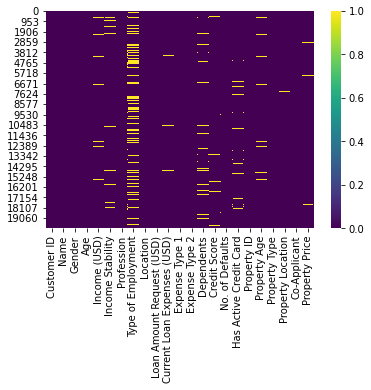

In [19]:
sns.heatmap(data = test_data.isnull(),cmap='viridis')

In [20]:
prediction_data=pd.DataFrame(test_data['Customer ID'])

In [21]:
test_data.drop(columns=["Customer ID","Name"],inplace=True)

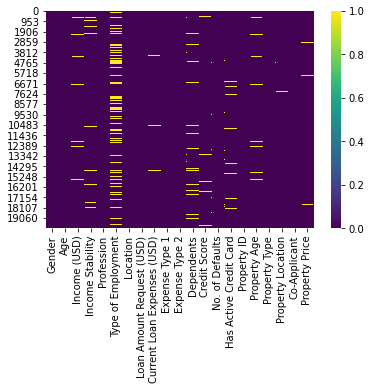

In [22]:
sns.heatmap(data = test_data.isnull(),cmap='viridis')

In [23]:
test_data

Gender  Age  Income (USD)  ... Property Location Co-Applicant Property Price
0          F   47       3472.69  ...             Urban            1      236644.50
1          F   57       1184.84  ...             Rural            1      142357.30
2          F   52       1266.27  ...             Urban            1      300991.24
3          M   65       1369.72  ...        Semi-Urban            0      125612.10
4          F   60       1939.23  ...        Semi-Urban            1      180908.00
...      ...  ...           ...  ...               ...          ...            ...
19995      F   19       1349.60  ...        Semi-Urban            1      212778.00
19996      M   22       2019.78  ...             Urban            1       90816.95
19997      M   19       2252.03  ...             Rural            0       21566.27
19998      F   21       1845.35  ...        Semi-Urban            1      120281.17
19999      M   21       5233.16  ...        Semi-Urban            0      133425.43

[20000 rows x 21 columns]

In [24]:
target_training=pd.DataFrame(train_data['Loan Sanction Amount (USD)'])

In [25]:
train_data.drop(columns=['Loan Sanction Amount (USD)'],inplace=True)

In [26]:
total_data= pd.concat([train_data,test_data])
total_data

Gender  Age  Income (USD)  ... Property Location Co-Applicant Property Price
0          F   56       1933.05  ...             Rural            1      119933.46
1          M   32       4952.91  ...             Rural            1       54791.00
2          F   65        988.19  ...             Urban            0       72440.58
3          F   65           NaN  ...        Semi-Urban            1      121441.51
4          F   31       2614.77  ...        Semi-Urban            1      208567.91
...      ...  ...           ...  ...               ...          ...            ...
19995      F   19       1349.60  ...        Semi-Urban            1      212778.00
19996      M   22       2019.78  ...             Urban            1       90816.95
19997      M   19       2252.03  ...             Rural            0       21566.27
19998      F   21       1845.35  ...        Semi-Urban            1      120281.17
19999      M   21       5233.16  ...        Semi-Urban            0      133425.43

[50000 rows x 21 columns]

In [27]:
cateogry_columns=total_data.select_dtypes(include=['object']).columns.tolist()
integer_columns=total_data.select_dtypes(include=['int64','float64']).columns.tolist()

for column in total_data:
  if column in cateogry_columns:
    total_data[column]=total_data[column].fillna(total_data[column].mode()[0])
  else:
    total_data[column]=total_data[column].fillna(total_data[column].mean())

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cateogry_columns:
  total_data[i] = le.fit_transform(total_data[i].astype(str))

In [29]:
mid_training_data = total_data.iloc[:30000,:]
mid_testing_data = total_data.iloc[30000:,:]

In [30]:
mid_training_data['Loan Sanction Amount (USD)']=target_training['Loan Sanction Amount (USD)']

In [31]:
null_target_data=mid_training_data[mid_training_data['Loan Sanction Amount (USD)'].isnull()]
null_target_data.drop(columns=['Loan Sanction Amount (USD)'],inplace=True)

In [32]:
null_target_data

Gender  Age  ...  Co-Applicant  Property Price
108         1   36  ...             2        80524.30
114         0   62  ...             2       251217.10
290         1   62  ...             1       123365.57
322         1   18  ...             2       134313.15
421         1   18  ...             2       260733.29
...       ...  ...  ...           ...             ...
29834       1   44  ...             2       319712.95
29866       1   18  ...             2       133391.83
29936       0   54  ...             2       104437.78
29944       0   36  ...             2       307855.67
29959       0   27  ...             1        41135.23

[340 rows x 21 columns]

In [33]:
total_training_data = mid_training_data[mid_training_data['Loan Sanction Amount (USD)'].notna()]

In [34]:
total_training_data

Gender  Age  ...  Property Price  Loan Sanction Amount (USD)
0           0   56  ...       119933.46                    54607.18
1           1   32  ...        54791.00                    37469.98
2           0   65  ...        72440.58                    36474.43
3           0   65  ...       121441.51                    56040.54
4           0   31  ...       208567.91                    74008.28
...       ...  ...  ...             ...                         ...
29995       1   38  ...       111096.56                    68992.11
29996       1   20  ...        73453.94                    46616.60
29997       0   49  ...       102108.02                    61057.56
29998       1   38  ...       168194.47                    99766.87
29999       0   63  ...       194512.60                   117217.90

[29660 rows x 22 columns]

In [35]:
x=total_training_data.drop(columns=['Loan Sanction Amount (USD)'])
y=total_training_data['Loan Sanction Amount (USD)']

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x, y)
train_preds = knn_model.predict(null_target_data)
null_target_data['Loan Sanction Amount (USD)']=train_preds

In [37]:
final_training=pd.concat([total_training_data,null_target_data])

In [38]:
final_training.to_csv("Cleaned_Training.csv",index=False)
mid_testing_data.to_csv("Cleaned_Testing.csv",index=False)

In [39]:
mid_testing_data.head()

Gender  Age  Income (USD)  ...  Property Location  Co-Applicant  Property Price
0       0   47       3472.69  ...                  2             2       236644.50
1       0   57       1184.84  ...                  0             2       142357.30
2       0   52       1266.27  ...                  2             2       300991.24
3       1   65       1369.72  ...                  1             1       125612.10
4       0   60       1939.23  ...                  1             2       180908.00

[5 rows x 21 columns]

## Training Model

In [40]:
x=final_training.drop(columns=['Loan Sanction Amount (USD)'])
y=final_training['Loan Sanction Amount (USD)']

In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29959
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  int64  
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  int64  
 4   Profession                   30000 non-null  int64  
 5   Type of Employment           30000 non-null  int64  
 6   Location                     30000 non-null  int64  
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  30000 non-null  float64
 9   Expense Type 1               30000 non-null  int64  
 10  Expense Type 2               30000 non-null  int64  
 11  Dependents                   30000 non-null  float64
 12  Credit Score                 30000 non-null  float64
 13  No. of Defaults 

In [42]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x, y)
xgb_pred=xgb.predict(mid_testing_data)

In [43]:
# xgb_pred[xgb_pred<0]=0

In [44]:
prediction_data['Loan Sanction Amount (USD)']=xgb_pred

In [45]:
prediction_data

Customer ID  Loan Sanction Amount (USD)
0         C-26247                91242.335938
1         C-35067                66532.875000
2         C-34590                17871.421875
3         C-16668                51761.101562
4         C-12196                69836.437500
...           ...                         ...
19995      C-9076                99843.875000
19996     C-17587                32416.939453
19997     C-46479                  322.772614
19998      C-3099                67949.773438
19999     C-43482                78167.414062

[20000 rows x 2 columns]

In [46]:
prediction_data.to_csv("XGB_Results.csv",index=False)

Feature: 0, Score: 0.00453
Feature: 1, Score: 0.01592
Feature: 2, Score: 0.01127
Feature: 3, Score: 0.15169
Feature: 4, Score: 0.01374
Feature: 5, Score: 0.01126
Feature: 6, Score: 0.00954
Feature: 7, Score: 0.30100
Feature: 8, Score: 0.01164
Feature: 9, Score: 0.01388
Feature: 10, Score: 0.01338
Feature: 11, Score: 0.01387
Feature: 12, Score: 0.11835
Feature: 13, Score: 0.02629
Feature: 14, Score: 0.01074
Feature: 15, Score: 0.01222
Feature: 16, Score: 0.01950
Feature: 17, Score: 0.01113
Feature: 18, Score: 0.00782
Feature: 19, Score: 0.20820
Feature: 20, Score: 0.01402


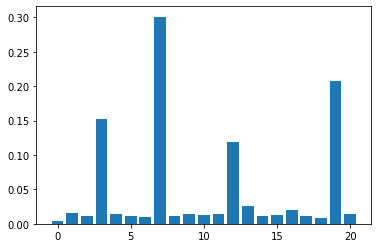

In [47]:
importance = xgb.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
prediction_rf=pd.DataFrame(prediction_data['Customer ID'])

In [49]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x, y)
pred_rf=regr.predict(mid_testing_data)

In [50]:
prediction_rf['Loan Sanction Amount (USD)']=pred_rf

In [51]:
prediction_rf['Loan Sanction Amount (USD)']=prediction_rf['Loan Sanction Amount (USD)'].round(2)

In [52]:
prediction_rf

Customer ID  Loan Sanction Amount (USD)
0         C-26247                    94488.47
1         C-35067                    44872.62
2         C-34590                    38873.10
3         C-16668                    44872.62
4         C-12196                    45252.25
...           ...                         ...
19995      C-9076                    94488.47
19996     C-17587                    18397.02
19997     C-46479                    18397.02
19998      C-3099                    44872.62
19999     C-43482                    44872.62

[20000 rows x 2 columns]

In [53]:
prediction_rf.to_csv("rf_Results.csv",index=False)

In [54]:
!pip install catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor(learning_rate=0.05,depth=15)
cat.fit(x, y)
cat_pred=cat.predict(mid_testing_data)
prediction_cat=pd.DataFrame(prediction_data['Customer ID'])
prediction_cat['Loan Sanction Amount (USD)']=cat_pred
prediction_cat['Loan Sanction Amount (USD)']=prediction_cat['Loan Sanction Amount (USD)'].round(2)
prediction_cat.to_csv("cat_Results.csv",index=False)

0:	learn: 46625.6678970	total: 1.06s	remaining: 17m 41s
1:	learn: 45023.0890512	total: 1.16s	remaining: 9m 41s
2:	learn: 43549.4141496	total: 1.97s	remaining: 10m 53s
3:	learn: 42194.0063697	total: 2.86s	remaining: 11m 52s
4:	learn: 40906.6008016	total: 3.7s	remaining: 12m 15s
5:	learn: 39692.2447691	total: 4.53s	remaining: 12m 29s
6:	learn: 38493.5125898	total: 5.43s	remaining: 12m 49s
7:	learn: 37396.0911190	total: 6.33s	remaining: 13m 4s
8:	learn: 36368.4092653	total: 7.19s	remaining: 13m 11s
9:	learn: 35395.4467693	total: 8.04s	remaining: 13m 16s
10:	learn: 34453.4943021	total: 8.47s	remaining: 12m 41s
11:	learn: 33637.0084174	total: 9.33s	remaining: 12m 48s
12:	learn: 32858.7987611	total: 10.2s	remaining: 12m 53s
13:	learn: 32148.3664933	total: 11.1s	remaining: 12m 59s
14:	learn: 31449.2643187	total: 11.9s	remaining: 13m 3s
15:	learn: 30818.8540471	total: 12.8s	remaining: 13m 7s
16:	learn: 30266.8158509	total: 13.7s	remaining: 13m 10s
17:	learn: 29706.5949521	total: 14.6s	remainin

In [55]:
prediction_cat

Customer ID  Loan Sanction Amount (USD)
0         C-26247                    97916.20
1         C-35067                    59511.61
2         C-34590                     1002.03
3         C-16668                    46770.00
4         C-12196                    67678.56
...           ...                         ...
19995      C-9076                    96668.55
19996     C-17587                    31578.70
19997     C-46479                    -2493.50
19998      C-3099                    70779.39
19999     C-43482                    73295.45

[20000 rows x 2 columns]

Feature: 0, Score: 2.96043
Feature: 1, Score: 4.79064
Feature: 2, Score: 2.61443
Feature: 3, Score: 1.81694
Feature: 4, Score: 3.66518
Feature: 5, Score: 2.72542
Feature: 6, Score: 1.31606
Feature: 7, Score: 18.02454
Feature: 8, Score: 3.38724
Feature: 9, Score: 2.12623
Feature: 10, Score: 1.91659
Feature: 11, Score: 2.24906
Feature: 12, Score: 15.70247
Feature: 13, Score: 0.86845
Feature: 14, Score: 3.74735
Feature: 15, Score: 4.38350
Feature: 16, Score: 3.04893
Feature: 17, Score: 4.26691
Feature: 18, Score: 3.14399
Feature: 19, Score: 13.45004
Feature: 20, Score: 3.79560


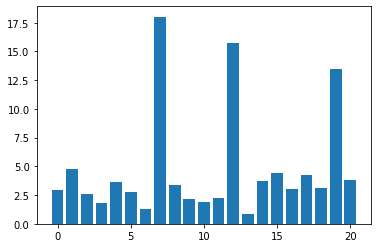

In [56]:
importance = cat.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [57]:
from autogluon.tabular import TabularPredictor,TabularDataset
final_training=TabularDataset(final_training)
predictor = TabularPredictor(label='Loan Sanction Amount (USD)').fit(train_data=final_training, time_limit=500)

No path specified. Models will be saved in: "AutogluonModels/ag-20210627_155636/"
Beginning AutoGluon training ... Time limit = 500s
AutoGluon will save models to "AutogluonModels/ag-20210627_155636/"
AutoGluon Version:  0.2.0
Train Data Rows:    30000
Train Data Columns: 21
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (481907.32, -999.0, 47673.60629, 48148.04654)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7912.65 MB
	Train Data (Original)  Memory Usage: 5.04 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_

In [58]:
predictions = predictor.predict(mid_testing_data)

In [59]:
predictor.leaderboard(final_training)

                  model    score_test     score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist -10345.197716 -35836.816117       43.563945       2.508342   0.011896                43.563945                2.508342           0.011896            1       True          2
1         ExtraTreesMSE -10529.758248 -22360.331241        2.154358       0.306865  18.989666                 2.154358                0.306865          18.989666            1       True          7
2       RandomForestMSE -10564.173309 -22509.017411        2.306244       0.305992  64.691668                 2.306244                0.305992          64.691668            1       True          5
3         LightGBMLarge -14140.580248 -22212.176087        0.646760       0.051052   2.694790                 0.646760                0.051052           2.694790            1       True         10
4   WeightedEns

model    score_test  ...  can_infer  fit_order
0        KNeighborsDist -10345.197716  ...       True          2
1         ExtraTreesMSE -10529.758248  ...       True          7
2       RandomForestMSE -10564.173309  ...       True          5
3         LightGBMLarge -14140.580248  ...       True         10
4   WeightedEnsemble_L2 -19999.443487  ...       True         11
5              LightGBM -20537.137210  ...       True          4
6               XGBoost -20950.369190  ...       True          9
7              CatBoost -21959.904341  ...       True          6
8            LightGBMXT -25399.697993  ...       True          3
9        KNeighborsUnif -30057.749922  ...       True          1
10      NeuralNetFastAI -31966.400480  ...       True          8

[11 rows x 12 columns]

In [60]:
predictions[predictions<0]=0
prediction_auto=pd.DataFrame(prediction_data['Customer ID'])
prediction_auto['Loan Sanction Amount (USD)']=predictions
prediction_auto['Loan Sanction Amount (USD)']=prediction_auto['Loan Sanction Amount (USD)'].round(2)
prediction_auto.to_csv("auto_Results.csv",index=False)

In [61]:
sample_data=pd.read_csv("https://raw.githubusercontent.com/Atharv-Chaudhari/Cipla-Loan-Prediction-Hackerearth-Competition/main/dataset/sample_submission.csv")
sample_data

Customer ID  Loan Sanction Amount (USD)
0     C-36995                    54607.18
1     C-33999                    37469.98
2      C-3770                    36474.43
3     C-26480                    56040.54
4     C-23459                    74008.28